In [129]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [130]:
df = pd.read_excel('Results.xlsx', sheet_name='Sheet2')

In [131]:
df_drnas = df.iloc[:,2:6]
df_gdas = df.iloc[:,6:10]
df_darts = df.iloc[:, 10:14]

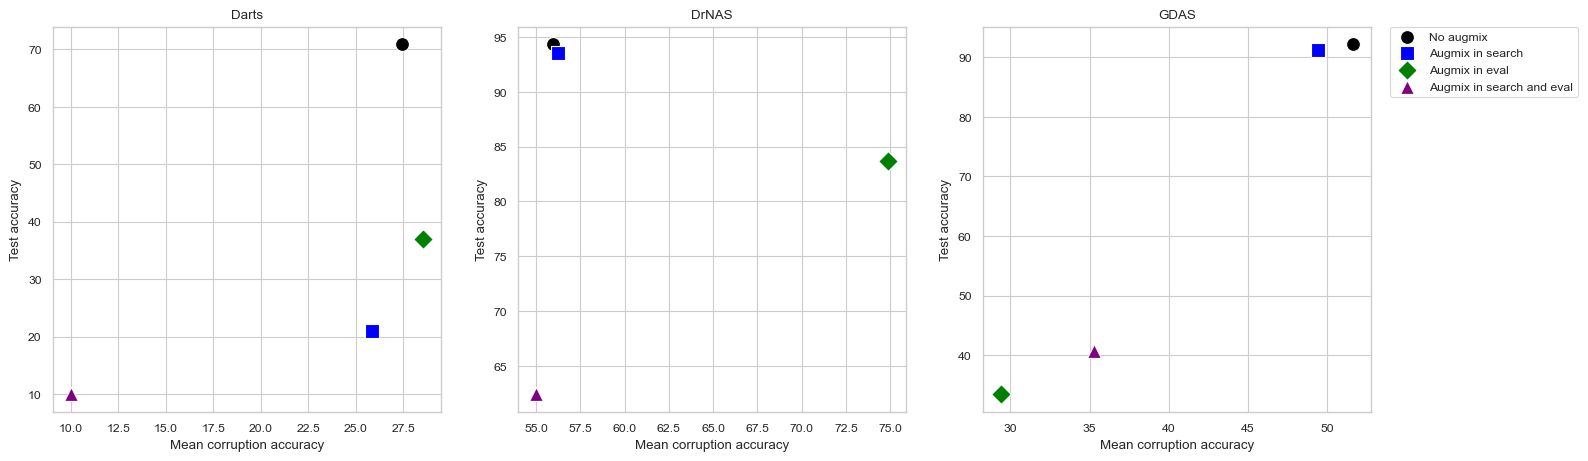

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
titles = ["Darts", "DrNAS", "GDAS"]
legends = ['No augmix', 'Augmix in search', 'Augmix in eval','Augmix in search and eval']
optimizers = [df_darts,df_drnas, df_gdas]
marker_styles = ['o', 's', 'D', '^']
colors = ['black', 'blue', 'green', 'purple']
for i,ax in enumerate(axes):
    # Create a pandas dataframe with the data 
    data_array = np.array(optimizers[i])
    data = {
        'Data Augmentation Technique': ['No Augmix', 'Augmix in Search', 'Augmix in Eval', 'Augmix in Search and eval'],
        'Mean corruption accuracy': 100 - data_array[0,:],
        'Test accuracy': data_array[1,:]
    }
    dtf= pd.DataFrame(data)


    # Create a scatter plot of the data
    # ax = sns.scatterplot(data=dtf, x='Mean corruption accuracy', y='Test accuracy', ax=ax)
    for j in range(len(legends)):
        subdtf = dtf.iloc[j:j+1,:]
        sns.scatterplot(data=subdtf, x='Mean corruption accuracy', y='Test accuracy', 
                        ax=ax, label=legends[j], s = 100, marker=marker_styles[j], color=colors[j], legend=False)
        
    # # Add labels to the plot
    # for i in range(len(dtf)):
    #     ax.text(dtf['Mean corruption Error'][i], dtf['Test accuracy'][i], dtf['Data Augmentation Technique'][i])

    ax.set_xlabel('Mean corruption accuracy')
    ax.set_ylabel('Test accuracy')
    ax.set_title(titles[i])
    # ax.legend()
# Add a single legend to the entire figure
# fig.legend(loc='lower center', ncol=len(legends))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)